# Ejercicio TF-IDF:

## Recomendador de Película

In [ ]:
import pandas as pd
df = pd.read_csv('movie_metadata.csv',sep=';')
df

Id                                        movie_title  \
0        1                                            Avatar    
1        2          Pirates of the Caribbean: At World's End    
2        3                                           Spectre    
3        4                             The Dark Knight Rises    
4        5  Star Wars: Episode VII - The Force Awakens    ...   
...    ...                                                ...   
5038  5039                           Signed Sealed Delivered    
5039  5040                         The Following                
5040  5041                              A Plague So Pleasant    
5041  5042                                  Shanghai Calling    
5042  5043                                 My Date with Drew    

                               genero  \
0     Action|Adventure|Fantasy|Sci-Fi   
1            Action|Adventure|Fantasy   
2           Action|Adventure|Thriller   
3                     Action|Thriller   
4                         Documentary   
...                               ...   
5038                     Comedy|Drama   
5039     Crime|Drama|Mystery|Thriller   
5040            Drama|Horror|Thriller   
5041             Comedy|Drama|Romance   
5042                      Documentary   

                                          plot_keywords      director_name  \
0                avatar|future|marine|native|paraplegic      James Cameron   
1     goddess|marriage ceremony|marriage proposal|pi...     Gore Verbinski   
2                   bomb|espionage|sequel|spy|terrorist         Sam Mendes   
3     deception|imprisonment|lawlessness|police offi...  Christopher Nolan   
4                                                   NaN        Doug Walker   
...                                                 ...                ...   
5038             fraud|postal worker|prison|theft|trial        Scott Smith   
5039       cult|fbi|hideout|prison escape|serial killer                NaN   
5040                                                NaN   Benjamin Roberds   
5041                                                NaN        Daniel Hsia   
5042  actress name in title|crush|date|four word tit...           Jon Gunn   

      num_critic_for_reviews  duration  director_facebook_likes  color  \
0                      723.0     178.0                      0.0  Color   
1                      302.0     169.0                    563.0  Color   
2                      602.0     148.0                      0.0  Color   
3                      813.0     164.0                  22000.0  Color   
4                        NaN       NaN                    131.0    NaN   
...                      ...       ...                      ...    ...   
5038                     1.0      87.0                      2.0  Color   
5039                    43.0      43.0                      NaN  Color   
5040                    13.0      76.0                      0.0  Color   
5041                    14.0     100.0                      0.0  Color   
5042                    43.0      90.0                     16.0  Color   

      actor_3_facebook_likes  ... num_user_for_reviews  language  country  \
0                      855.0  ...               3054.0   English      USA   
1                     1000.0  ...               1238.0   English      USA   
2                      161.0  ...                994.0   English       UK   
3                    23000.0  ...               2701.0   English      USA   
4                        NaN  ...                  NaN       NaN      NaN   
...                      ...  ...                  ...       ...      ...   
5038                   318.0  ...                  6.0   English   Canada   
5039                   319.0  ...                359.0   English      USA   
5040                     0.0  ...                  3.0   English      USA   
5041                   489.0  ...                  9.0   English      USA   
5042                    16.0  ...                 84.0   Engl

In [ ]:
df['genero']=df['genero'].str.replace('|', ' ')
df

Id                                        movie_title  \
0        1                                            Avatar    
1        2          Pirates of the Caribbean: At World's End    
2        3                                           Spectre    
3        4                             The Dark Knight Rises    
4        5  Star Wars: Episode VII - The Force Awakens    ...   
...    ...                                                ...   
5038  5039                           Signed Sealed Delivered    
5039  5040                         The Following                
5040  5041                              A Plague So Pleasant    
5041  5042                                  Shanghai Calling    
5042  5043                                 My Date with Drew    

                               genero  \
0     Action Adventure Fantasy Sci-Fi   
1            Action Adventure Fantasy   
2           Action Adventure Thriller   
3                     Action Thriller   
4                         Documentary   
...                               ...   
5038                     Comedy Drama   
5039     Crime Drama Mystery Thriller   
5040            Drama Horror Thriller   
5041             Comedy Drama Romance   
5042                      Documentary   

                                          plot_keywords      director_name  \
0                avatar|future|marine|native|paraplegic      James Cameron   
1     goddess|marriage ceremony|marriage proposal|pi...     Gore Verbinski   
2                   bomb|espionage|sequel|spy|terrorist         Sam Mendes   
3     deception|imprisonment|lawlessness|police offi...  Christopher Nolan   
4                                                   NaN        Doug Walker   
...                                                 ...                ...   
5038             fraud|postal worker|prison|theft|trial        Scott Smith   
5039       cult|fbi|hideout|prison escape|serial killer                NaN   
5040                                                NaN   Benjamin Roberds   
5041                                                NaN        Daniel Hsia   
5042  actress name in title|crush|date|four word tit...           Jon Gunn   

      num_critic_for_reviews  duration  director_facebook_likes  color  \
0                      723.0     178.0                      0.0  Color   
1                      302.0     169.0                    563.0  Color   
2                      602.0     148.0                      0.0  Color   
3                      813.0     164.0                  22000.0  Color   
4                        NaN       NaN                    131.0    NaN   
...                      ...       ...                      ...    ...   
5038                     1.0      87.0                      2.0  Color   
5039                    43.0      43.0                      NaN  Color   
5040                    13.0      76.0                      0.0  Color   
5041                    14.0     100.0                      0.0  Color   
5042                    43.0      90.0                     16.0  Color   

      actor_3_facebook_likes  ... num_user_for_reviews  language  country  \
0                      855.0  ...               3054.0   English      USA   
1                     1000.0  ...               1238.0   English      USA   
2                      161.0  ...                994.0   English       UK   
3                    23000.0  ...               2701.0   English      USA   
4                        NaN  ...                  NaN       NaN      NaN   
...                      ...  ...                  ...       ...      ...   
5038                   318.0  ...                  6.0   English   Canada   
5039                   319.0  ...                359.0   English      USA   
5040                     0.0  ...                  3.0   English      USA   
5041                   489.0  ...                  9.0   English      USA   
5042                    16.0  ...                 84.0   Engl

In [ ]:
df['plot_keywords']=df['plot_keywords'].str.replace('|', ' ')
df

Id                                        movie_title  \
0        1                                            Avatar    
1        2          Pirates of the Caribbean: At World's End    
2        3                                           Spectre    
3        4                             The Dark Knight Rises    
4        5  Star Wars: Episode VII - The Force Awakens    ...   
...    ...                                                ...   
5038  5039                           Signed Sealed Delivered    
5039  5040                         The Following                
5040  5041                              A Plague So Pleasant    
5041  5042                                  Shanghai Calling    
5042  5043                                 My Date with Drew    

                               genero  \
0     Action Adventure Fantasy Sci-Fi   
1            Action Adventure Fantasy   
2           Action Adventure Thriller   
3                     Action Thriller   
4                         Documentary   
...                               ...   
5038                     Comedy Drama   
5039     Crime Drama Mystery Thriller   
5040            Drama Horror Thriller   
5041             Comedy Drama Romance   
5042                      Documentary   

                                          plot_keywords      director_name  \
0                avatar future marine native paraplegic      James Cameron   
1     goddess marriage ceremony marriage proposal pi...     Gore Verbinski   
2                   bomb espionage sequel spy terrorist         Sam Mendes   
3     deception imprisonment lawlessness police offi...  Christopher Nolan   
4                                                   NaN        Doug Walker   
...                                                 ...                ...   
5038             fraud postal worker prison theft trial        Scott Smith   
5039       cult fbi hideout prison escape serial killer                NaN   
5040                                                NaN   Benjamin Roberds   
5041                                                NaN        Daniel Hsia   
5042  actress name in title crush date four word tit...           Jon Gunn   

      num_critic_for_reviews  duration  director_facebook_likes  color  \
0                      723.0     178.0                      0.0  Color   
1                      302.0     169.0                    563.0  Color   
2                      602.0     148.0                      0.0  Color   
3                      813.0     164.0                  22000.0  Color   
4                        NaN       NaN                    131.0    NaN   
...                      ...       ...                      ...    ...   
5038                     1.0      87.0                      2.0  Color   
5039                    43.0      43.0                      NaN  Color   
5040                    13.0      76.0                      0.0  Color   
5041                    14.0     100.0                      0.0  Color   
5042                    43.0      90.0                     16.0  Color   

      actor_3_facebook_likes  ... num_user_for_reviews  language  country  \
0                      855.0  ...               3054.0   English      USA   
1                     1000.0  ...               1238.0   English      USA   
2                      161.0  ...                994.0   English       UK   
3                    23000.0  ...               2701.0   English      USA   
4                        NaN  ...                  NaN       NaN      NaN   
...                      ...  ...                  ...       ...      ...   
5038                   318.0  ...                  6.0   English   Canada   
5039                   319.0  ...                359.0   English      USA   
5040                     0.0  ...                  3.0   English      USA   
5041                   489.0  ...                  9.0   English      USA   
5042                    16.0  ...                 84.0   Engl

In [ ]:
def multiplicacion(a,b):
    return a * b


print(multiplicacion(5,4)) #INVOCO A LA FUNCION POR SU NOMBRE

#########################################

multiplicar_2 = lambda a,b: a*b #ASIGNO UNA VARIABLE MULTIPLICAR_2 PARA RECIBIR LO QUE LAMBDA DEVUELDE "AUTOMATICAMENTE"

print(multiplicar_2(3,5))#UTILIZAR LAMBDA CON EL NOMBRE DE LA VARIABLE QUE RECIBE EL RESULTA DE LAMBDA

20
15


In [ ]:
df['texto'] = df[['genero', 'plot_keywords']].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
df

Id                                        movie_title  \
0        1                                            Avatar    
1        2          Pirates of the Caribbean: At World's End    
2        3                                           Spectre    
3        4                             The Dark Knight Rises    
4        5  Star Wars: Episode VII - The Force Awakens    ...   
...    ...                                                ...   
5038  5039                           Signed Sealed Delivered    
5039  5040                         The Following                
5040  5041                              A Plague So Pleasant    
5041  5042                                  Shanghai Calling    
5042  5043                                 My Date with Drew    

                               genero  \
0     Action Adventure Fantasy Sci-Fi   
1            Action Adventure Fantasy   
2           Action Adventure Thriller   
3                     Action Thriller   
4                         Documentary   
...                               ...   
5038                     Comedy Drama   
5039     Crime Drama Mystery Thriller   
5040            Drama Horror Thriller   
5041             Comedy Drama Romance   
5042                      Documentary   

                                          plot_keywords      director_name  \
0                avatar future marine native paraplegic      James Cameron   
1     goddess marriage ceremony marriage proposal pi...     Gore Verbinski   
2                   bomb espionage sequel spy terrorist         Sam Mendes   
3     deception imprisonment lawlessness police offi...  Christopher Nolan   
4                                                   NaN        Doug Walker   
...                                                 ...                ...   
5038             fraud postal worker prison theft trial        Scott Smith   
5039       cult fbi hideout prison escape serial killer                NaN   
5040                                                NaN   Benjamin Roberds   
5041                                                NaN        Daniel Hsia   
5042  actress name in title crush date four word tit...           Jon Gunn   

      num_critic_for_reviews  duration  director_facebook_likes  color  \
0                      723.0     178.0                      0.0  Color   
1                      302.0     169.0                    563.0  Color   
2                      602.0     148.0                      0.0  Color   
3                      813.0     164.0                  22000.0  Color   
4                        NaN       NaN                    131.0    NaN   
...                      ...       ...                      ...    ...   
5038                     1.0      87.0                      2.0  Color   
5039                    43.0      43.0                      NaN  Color   
5040                    13.0      76.0                      0.0  Color   
5041                    14.0     100.0                      0.0  Color   
5042                    43.0      90.0                     16.0  Color   

      actor_3_facebook_likes  ... language  country  content_rating  \
0                      855.0  ...  English      USA           PG-13   
1                     1000.0  ...  English      USA           PG-13   
2                      161.0  ...  English       UK           PG-13   
3                    23000.0  ...  English      USA           PG-13   
4                        NaN  ...      NaN      NaN             NaN   
...                      ...  ...      ...      ...             ...   
5038                   318.0  ...  English   Canada             NaN   
5039                   319.0  ...  English      USA           TV-14   
5040                     0.0  ...  English      USA             NaN   
5041                   489.0  ...  English      USA           PG-13   
5042                    16.0  ...  English      USA              PG   

           budget  title_year  actor_2_facebook_likes i

In [ ]:
row = df[['genero', 'plot_keywords', 'texto']].iloc[0]
print(row)

genero                             Action Adventure Fantasy Sci-Fi
plot_keywords               avatar future marine native paraplegic
texto            Action Adventure Fantasy Sci-Fi avatar future ...
Name: 0, dtype: object


In [ ]:
print(df['texto'].iloc[0])

Action Adventure Fantasy Sci-Fi avatar future marine native paraplegic


TF-IDF se calcula multiplicando dos componentes. TF se calcula como el numero de veces que la palabra aparece en el documento dividido el total de palabras del documento. Mientras que IDF se calcula como el logaritmo del cociente entre la totalidad de documentos dividido el numero de documentos donde aparece la palabra. 

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

In [ ]:
tfidf = TfidfVectorizer(max_features = 2000) #consideramos la cantidad maxima de tokens = 2000

In [ ]:
X = tfidf.fit_transform(df['texto'])
X

<5043x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 44000 stored elements in Compressed Sparse Row format>

In [ ]:
peliculas = pd.Series(df.index, index=df['movie_title']) #CREO UNA ESTRUCTURA DEL TIPO SERIES DE PANDAS

In [ ]:
peliculas #Esto nos permite trabajar con los indices de manera mas sencilla

movie_title
Avatar                                                        0
Pirates of the Caribbean: At World's End                      1
Spectre                                                       2
The Dark Knight Rises                                         3
Star Wars: Episode VII - The Force Awakens                    4
                                                           ... 
Signed Sealed Delivered                                    5038
The Following                                              5039
A Plague So Pleasant                                       5040
Shanghai Calling                                           5041
My Date with Drew                                          5042
Length: 5043, dtype: int64

In [ ]:
peliculas.index = peliculas.index.str.strip()#POR LAS DUDAS QUITAMOS LOS ESPACIOS AL FINAL Y AL PRINCIPIO
peliculas

movie_title
Avatar                                           0
Pirates of the Caribbean: At World's End         1
Spectre                                          2
The Dark Knight Rises                            3
Star Wars: Episode VII - The Force Awakens       4
                                              ... 
Signed Sealed Delivered                       5038
The Following                                 5039
A Plague So Pleasant                          5040
Shanghai Calling                              5041
My Date with Drew                             5042
Length: 5043, dtype: int64

In [ ]:
contenido_SP = peliculas['The Following']

In [ ]:
contenido_SP

5039

In [ ]:
consulta = X[contenido_SP]
consulta

<1x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [ ]:
print(consulta)# VISUALZO LOS TF-IDF DE CADA PALABRA DENTRO DE LA FILA 0

  (0, 971)	0.372904785343501
  (0, 1557)	0.39511060256573133
  (0, 633)	0.3647909175880364
  (0, 451)	0.383150217184967
  (0, 437)	0.19507528466969007
  (0, 588)	0.3876975158087363
  (0, 531)	0.11917943731633035
  (0, 1388)	0.3738658183913906
  (0, 1181)	0.2369357483671153
  (0, 1797)	0.16270053035082885


In [ ]:
consulta.toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
similitud = cosine_similarity(consulta, X)#UTILIZO EL CONCEPTO DE SIMILITUD DE COSENO ES DECIR CUANDO EL COSENO ES MAS PROXIMO A 1 OS VECTORES ESTAN MAS PROXIMOS LO QUE SIGNIFICA QUE LAS PELICULAS SE PARECEN O SON SIMILARES

In [ ]:
similitud #ACA OBTENEMOS LOS VALORES DE LOS COSENOS DE LOS ANGULOS ENTRE LOS VECTORES

array([[0.        , 0.        , 0.0257117 , ..., 0.09187877, 0.0344376 ,
        0.        ]])

In [ ]:
similitud[0][5039] #La pelicula The Dark Knight Rises tiene similitud consigo misma lo que es logico

1.0000000000000004

In [ ]:
similitud = similitud.flatten()

In [ ]:
similitud[5039]

1.0000000000000004

In [ ]:
import matplotlib.pyplot as plt #IMPRIMO UNA GRAFICA CON EL GRADO DE SIMILITUD ENTRE LA PELICULA AVATAR Y EL RESTO DE LAS PELICULAS

## Vamos a graficar las "similitudes" por cada uno de los valores

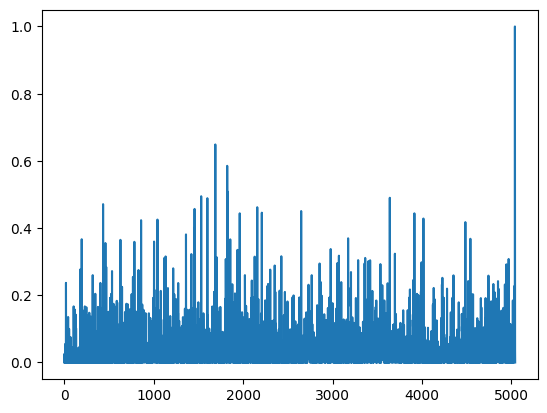

In [ ]:
plt.plot(similitud)#IMPRIMO EL GRAFICO

In [ ]:
(-similitud).argsort()#ORDENO LA INFORMACION DE MAS SIMIL A MENOS SIMIL

array([5039, 1689, 1822, ..., 2339, 2307, 5042])

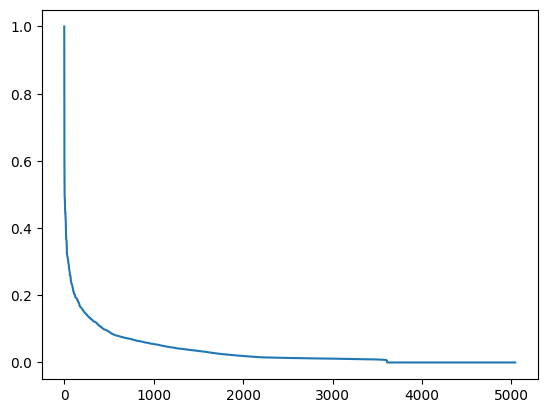

In [ ]:
plt.plot(similitud[(-similitud).argsort()])#IMPRIMO EL GRAFICO YA ORDENADO

In [ ]:
recomendacion = (-similitud).argsort()[1:11] #DE TODAS LAS PELICULAS ORDENADAS ME QUEDO CON LAS 10 PRIMERAS A MODO DE RECOMENDACION

In [ ]:
df['movie_title'].iloc[recomendacion]#OBTENGO LOS TITULOS DE LAS 10 PELICULAS MAS SIMILARES A AVATAR 

1689                   88 Minutes
1822                Suspect Zero 
1828                 Mindhunters 
1531                 The Watcher 
3640                 Lucky Break 
1600                        Se7en
434                       Zodiac 
2158    The Silence of the Lambs 
1457                 Untraceable 
2649     Halloween: Resurrection 
Name: movie_title, dtype: object